In [1]:
from nltk import word_tokenize  # Import the word_tokenize function from NLTK
from string import punctuation
punctuation_list = list(punctuation)  # Convert punctuation to a list
text = "I like playing tennis. I enjoy sports. Do I enjoy tennis?"
tokens = word_tokenize(text.lower())  # Tokenise "text" into words
words_list = []
for word in tokens:
    if (word not in punctuation_list):
        words_list.append(word)
print(text, "->", words_list)

I like playing tennis. I enjoy sports. Do I enjoy tennis? -> ['i', 'like', 'playing', 'tennis', 'i', 'enjoy', 'sports', 'do', 'i', 'enjoy', 'tennis']


In [3]:
context_size = 1
query_word = "i"
context = []
for i in range(len(words_list)):  # Iterate through word list
    if (words_list[i] == query_word):  # Check if word is the query word
        print("Found '%s' at position %.0f. Context:" % (query_word, i))
        for j in range(i-context_size, i+context_size+1):  # Iterate through the context
            # Ignore query word and non-valid word indexes
            if ((j != i) and (j >= 0) and (j < len(words_list))):
                context.append(words_list[j])  # Add word to context list
                print("[%.0f][%.0f] %s" % (i, j, words_list[j]))

print("\nContext of '%s'-> %s" % (query_word, context))

Found 'i' at position 0. Context:
[0][1] like
Found 'i' at position 4. Context:
[4][3] tennis
[4][5] enjoy
Found 'i' at position 8. Context:
[8][7] do
[8][9] enjoy

Context of 'i'-> ['like', 'tennis', 'enjoy', 'do', 'enjoy']


In [4]:
def get_context(word, words_list,context_size):
    context = []
    for i in range(len(words_list)): # Iterate through word list
        if(words_list[i] == word): # Check if word is the query word
            for j in range(i-context_size,i+context_size+1): # Iterate through the context
                if( (j != i) and (j>=0) and (j<len(words_list)) ): # Ignore query word and non-valid word indexes
                    context.append(words_list[j]) # Add word to context list
    return context
print("\nContext (size=%.0f) of '%s'-> %s\n" % (1,"i",get_context("i", words_list,1)))
print("\nContext (size=%.0f) of '%s'-> %s\n" % (2,"i",get_context("i", words_list,2)))
print("\nContext (size=%.0f) of '%s'-> %s\n" % (3,"i",get_context("i", words_list,3)))
print("\nContext (size=%.0f) of '%s'-> %s\n" % (1,"enjoy",get_context("enjoy", words_list,1)))
print("\nContext (size=%.0f) of '%s'-> %s\n" % (2,"enjoy",get_context("enjoy", words_list,2)))
print("\nContext (size=%.0f) of '%s'-> %s\n" % (3,"enjoy",get_context("enjoy", words_list,3)))


Context (size=1) of 'i'-> ['like', 'tennis', 'enjoy', 'do', 'enjoy']


Context (size=2) of 'i'-> ['like', 'playing', 'playing', 'tennis', 'enjoy', 'sports', 'sports', 'do', 'enjoy', 'tennis']


Context (size=3) of 'i'-> ['like', 'playing', 'tennis', 'like', 'playing', 'tennis', 'enjoy', 'sports', 'do', 'enjoy', 'sports', 'do', 'enjoy', 'tennis']


Context (size=1) of 'enjoy'-> ['i', 'sports', 'i', 'tennis']


Context (size=2) of 'enjoy'-> ['tennis', 'i', 'sports', 'do', 'do', 'i', 'tennis']


Context (size=3) of 'enjoy'-> ['playing', 'tennis', 'i', 'sports', 'do', 'i', 'sports', 'do', 'i', 'tennis']



In [7]:
vocabulary = set(words_list)  # Create vocabulary of unique words
# Convert vocabulary to list to preserve ordering and sort it for better presentation
vocabulary = sorted(list(vocabulary))
print("Vocabulary:", vocabulary, "\n")
context_size = 1
print("%7s" % "", end='')
for word in vocabulary:
    print("\t%7s" % word, end='')
print("\n")
for word in vocabulary:
    print("%7s" % word, end='')
    context = get_context(word, words_list, context_size)
    for context_word in vocabulary:
        # Prints the number of times that context_word appears in the context list
        print("\t%7.0f" % context.count(context_word), end='')
    print("\n")

Vocabulary: ['do', 'enjoy', 'i', 'like', 'playing', 'sports', 'tennis'] 

       	     do	  enjoy	      i	   like	playing	 sports	 tennis

     do	      0	      0	      1	      0	      0	      1	      0

  enjoy	      0	      0	      2	      0	      0	      1	      1

      i	      1	      2	      0	      1	      0	      0	      1

   like	      0	      0	      1	      0	      1	      0	      0

playing	      0	      0	      0	      1	      0	      0	      1

 sports	      1	      1	      0	      0	      0	      0	      0

 tennis	      0	      1	      1	      0	      1	      0	      0



In [9]:
import numpy as np


def compute_word_word_matrix(vocabulary, words_list, context_size):
    # Create empty array of size VxV
    word_word_matrix = np.zeros((len(vocabulary), len(vocabulary)), dtype=int)
    for i in range(len(vocabulary)):
        context = get_context(vocabulary[i], words_list, context_size)
        for j in range(len(vocabulary)):
            word_word_matrix[i, j] = context.count(vocabulary[j])
    return word_word_matrix


context_size = 2
word_word_matrix = compute_word_word_matrix(
    vocabulary, words_list, context_size)
print(word_word_matrix)

[[0 2 1 0 0 1 0]
 [2 0 2 0 0 1 2]
 [1 2 0 1 2 2 2]
 [0 0 1 0 1 0 1]
 [0 0 2 1 0 0 1]
 [1 1 2 0 0 0 0]
 [0 2 2 1 1 0 0]]


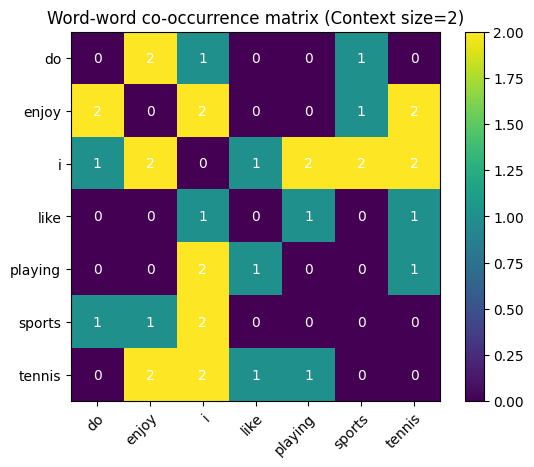

In [10]:
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# Create heat map using the 'viridis' colourmap
im = ax.imshow(word_word_matrix, cmap='viridis')
 # Show all ticks
ax.set_xticks(np.arange(len(vocabulary)))
ax.set_yticks(np.arange(len(vocabulary)))
# Label ticks with the respective list entries
ax.set_xticklabels(vocabulary)
ax.set_yticklabels(vocabulary)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",rotation_mode="anchor")
# Loop over data dimensions and create text annotations.
for i in range(len(vocabulary)):
    for j in range(len(vocabulary)):
        text = ax.text(j, i, word_word_matrix[i, j], ha="center", va="center", color="w")
ax.set_title("Word-word co-occurrence matrix (Context size=%.0f)" % context_size)
plt.colorbar(im) # Add colour bar with colour range
plt.show() # Show plot

In [11]:
def get_word_embedding(word, word_word_matrix, vocabulary):
    # Gets word's index. Vocabulary must be of list type
    word_index = vocabulary.index(word)
    # Return the word_index-th row of the word-word matrix
    return word_word_matrix[word_index, :]


word_vectors = dict()
for word in vocabulary:
    word_vectors[word] = get_word_embedding(word, word_word_matrix, vocabulary)
    print(word, "->", get_word_embedding(word, word_word_matrix, vocabulary))


print("\n%s" % word_vectors)

do -> [0 2 1 0 0 1 0]
enjoy -> [2 0 2 0 0 1 2]
i -> [1 2 0 1 2 2 2]
like -> [0 0 1 0 1 0 1]
playing -> [0 0 2 1 0 0 1]
sports -> [1 1 2 0 0 0 0]
tennis -> [0 2 2 1 1 0 0]

{'do': array([0, 2, 1, 0, 0, 1, 0]), 'enjoy': array([2, 0, 2, 0, 0, 1, 2]), 'i': array([1, 2, 0, 1, 2, 2, 2]), 'like': array([0, 0, 1, 0, 1, 0, 1]), 'playing': array([0, 0, 2, 1, 0, 0, 1]), 'sports': array([1, 1, 2, 0, 0, 0, 0]), 'tennis': array([0, 2, 2, 1, 1, 0, 0])}


i-> [2 1]
tennis-> [2 0] 



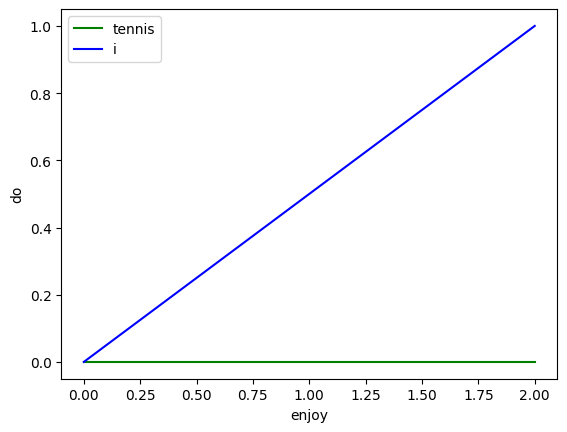

In [12]:
# Get index of word "enjoy" in vocabulary
index_enjoy = vocabulary.index("enjoy")
index_do = vocabulary.index("do")  # Get index of word "do" in vocabulary
# Create word embedding using only the values for the dimensions "enjoy" and "do"
embedding_i = word_vectors["i"][[index_enjoy, index_do]]
print("i->", embedding_i)
embedding_tennis = word_vectors["tennis"][[index_enjoy, index_do]]
print("tennis->", embedding_tennis, "\n")
fig = plt.subplots()
plt.plot([0, embedding_tennis[0]], [0, embedding_tennis[1]], 'g',
         label="tennis")  # Plot line from (0,0) to the "tennis" coordinates
# Plot line from (0,0) to the "i" coordinates
plt.plot([0, embedding_i[0]], [0, embedding_i[1]], 'b', label="i")
plt.xlabel('enjoy')  # Set label for x axis
plt.ylabel('do')  # Set label for y axis
plt.legend(loc="upper left")  # Show plot legend at upper left location
plt.show()  # Show plot

In [13]:
from scipy.spatial import distance
print("Words cosine distance:")
for word1 in vocabulary:
    for word2 in vocabulary:
        print(word1,"->",word2,"=",distance.cosine(word_vectors[word1],word_vectors[word2]))

Words cosine distance:
do -> do = 0
do -> enjoy = 0.6603168897566213
do -> i = 0.42264973081037427
do -> like = 0.7642977396044841
do -> playing = 0.6666666666666667
do -> sports = 0.33333333333333337
do -> tennis = 0.2254033307585166
enjoy -> do = 0.6603168897566213
enjoy -> enjoy = 0
enjoy -> i = 0.4770236396315093
enjoy -> like = 0.3594873847796515
enjoy -> playing = 0.32063377951324257
enjoy -> sports = 0.32063377951324257
enjoy -> tennis = 0.6491767922771883
i -> do = 0.42264973081037427
i -> enjoy = 0.4770236396315093
i -> i = 0
i -> like = 0.45566894604818264
i -> playing = 0.7113248654051871
i -> sports = 0.7113248654051871
i -> tennis = 0.47825080525004915
like -> do = 0.7642977396044841
like -> enjoy = 0.3594873847796515
like -> i = 0.45566894604818264
like -> like = 0
like -> playing = 0.2928932188134524
like -> sports = 0.5285954792089682
like -> tennis = 0.4522774424948339
playing -> do = 0.6666666666666667
playing -> enjoy = 0.32063377951324257
playing -> i = 0.7113248654

### Exercise 5.1
Create the word-word co-occurrence matrix for the dune.txt text for a context size equal to the 3 words prior and after a word. Visualise the word-word co-occurrence matrix as a heatmap.

['in', 'the', 'week', 'before', 'their', 'departure', 'to', 'arrakis', ',', 'when', 'all', 'the', 'final', 'scurrying', 'about', 'had', 'reached', 'a', 'nearly', 'unbearable', 'frenzy', ',', 'an', 'old', 'crone', 'came', 'to', 'visit', 'the', 'mother', 'of', 'the', 'boy', ',', 'paul', '.', 'it', 'was', 'a', 'warm', 'night', 'at', 'castle', 'caladan', ',', 'and', 'the', 'ancient', 'pile', 'of', 'stone', 'that', 'had', 'served', 'the', 'atreides', 'family', 'as', 'home', 'for', 'twenty-six', 'generations', 'bore', 'that', 'cooled-sweat', 'feeling', 'it', 'acquired', 'before', 'a', 'change', 'in', 'the', 'weather', '.', 'the', 'old', 'woman', 'was', 'let', 'in', 'by', 'the', 'side', 'door', 'down', 'the', 'vaulted', 'passage', 'by', 'paul', "'s", 'room', 'and', 'she', 'was', 'allowed', 'a', 'moment', 'to', 'peer', 'in', 'at', 'him', 'where', 'he', 'lay', 'in', 'his', 'bed', '.', 'by', 'the', 'half-light', 'of', 'a', 'suspensor', 'lamp', ',', 'dimmed', 'and', 'hanging', 'near', 'the', 'flo

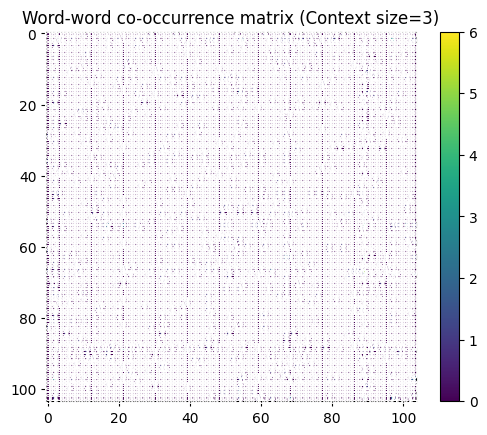

In [52]:
import nltk  # Import the NLTK library
from nltk import sent_tokenize  # Import the sent_tokenize function from NLTK
from nltk import word_tokenize  # Import the word_tokenize function from NLTK
from string import punctuation  # Import the punctuation marks string
import matplotlib
import matplotlib.pyplot as plt

duneFile = open("./dune.txt", "r")  # Opens the file for reading only ("r")
# Store the contents of the file in variable "text". read() returns all the contents of the file
duneData = duneFile.read()
duneFile.close()  # Close the file
# print(duneData) # Print the contents of variable "text"


duneData_words_lowercase = []
for sentence in sent_tokenize(duneData):  # Iterate the sentences in "duneData"
    for word in word_tokenize(sentence):  # Iterate the words in "sentence"
        # Convert word to lowercase and add it to the "words_lowercase" list
        duneData_words_lowercase.append(word.lower())
print(duneData_words_lowercase)  # Print the list of lowercase words

punctuation_list = list(punctuation)  # Convert punctuation to a list
duneData_words_no_punctuation = []
for word in duneData_words_lowercase:  # Iterate the words in "words_lowercase"
    if (word not in punctuation_list):  # Check if word is not in the punctuation list
        # Add word to "words_no_punctuation" list
        duneData_words_no_punctuation.append(word)

# Print the list of words without punctuation
print(duneData_words_no_punctuation)
# ------------------- Vocabulary -------------------------
duneData_wordlist = duneData_words_no_punctuation
# Create vocabulary of unique words
duneData_vocabulary = set(duneData_wordlist)
duneData_vocabulary = sorted(list(duneData_vocabulary))
# ------------------- Word-word matrix -------------------
context_size = 3
duneData_word_word_matrix = compute_word_word_matrix(
    duneData_vocabulary, duneData_wordlist, context_size)
print(duneData_word_word_matrix)
# ------------------- Heat map -------------------
fig, ax = plt.subplots()
# Create heat map using the 'viridis' colourmap
im = ax.imshow(duneData_word_word_matrix, cmap='viridis')
# Show all ticks
for i in range(len(duneData_vocabulary)):
    for j in range(len(duneData_vocabulary)):
        text = ax.text(
            j, i, duneData_word_word_matrix[i, j], ha="center", va="center", color="w")
ax.set_title("Word-word co-occurrence matrix (Context size=%.0f)" %
             context_size)
plt.colorbar(im)  # Add colour bar with colour range
plt.show()  # Show plot

###  Exercise 5.2
Use the word-word co-occurrence matrix that you computed in Exercise 5.1 in order to compute the respective word embeddings for all words in the vocabulary of dune.txt. Then compute the pairwise cosine distance between all words in the vocabulary and visualise them as a heatmap.

In [53]:
print(duneData_vocabulary)

["'round", "'s", 'a', 'about', 'acquired', 'ahead', 'all', 'allowed', 'an', 'ancient', 'and', 'arrakis', 'as', 'at', 'atreides', 'awakened', 'bed', 'before', 'bore', 'boy', 'bulky', 'by', 'caladan', 'came', 'castle', 'change', 'cooled-sweat', 'could', 'crone', 'darkness', 'departure', 'dimmed', 'door', 'down', 'eyes', 'family', 'features', 'feeling', 'female', 'final', 'floor', 'for', 'frenzy', 'generations', 'glittering', 'had', 'hair', 'half-light', 'hanging', 'he', 'him', 'his', 'home', 'hooded', 'in', 'it', 'jewels', 'lamp', 'lay', 'let', 'like', 'matted', 'moment', 'mother', 'near', 'nearly', 'night', 'of', 'old', 'one', 'passage', 'paul', 'peer', 'pile', 'reached', 'room', 'scurrying', 'see', 'served', 'shadow', 'shape', 'she', 'side', 'spiderwebs', 'standing', 'step', 'stone', 'suspensor', 'that', 'the', 'their', 'to', 'twenty-six', 'unbearable', 'vaulted', 'visit', 'warm', 'was', 'weather', 'week', 'when', 'where', 'witch', 'woman']


In [54]:
from scipy.spatial import distance
word_vectors = dict()
for word in duneData_vocabulary:
    word_vectors[word] = get_word_embedding(
        word, duneData_word_word_matrix, duneData_vocabulary)
    # print(word, "->", get_word_embedding(word, duneData_word_word_matrix, duneData_vocabulary))

print("Words cosine distance:")
for word1 in duneData_vocabulary:
    for word2 in duneData_vocabulary:
        print(word1, "->", word2, "=",
              distance.cosine(duneData_word_word_matrix[word1], duneData_word_word_matrix[word2]))
# for word1 in vocabulary:
#     for word2 in vocabulary:
#         print(word1, "->", word2, "=",
#               distance.cosine(word_vectors[word1], word_vectors[word2]))

Words cosine distance:


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# It is same to Exercise 5.1 and 5.2